In [12]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import make_classification

In [13]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [14]:
df = pd.DataFrame(X, columns=["col1", "col2", "col3", "col4", "col5"])
df['target'] = y
df

,col1,col2,col3,col4,col5,target
0,0.984148,2.103527,-1.630537,-1.004464,2.694327,0
1,0.102650,1.581897,1.043885,0.996651,0.964575,1
2,-0.724848,0.291246,-0.756002,-1.584015,2.288474,0
3,0.133110,1.108147,-2.209490,-0.859870,0.787880,0
4,-2.830581,2.529109,-2.204290,0.423153,-1.192365,0
...,...,...,...,...,...,...
95,0.739025,-0.973972,-1.354134,-2.549386,1.884388,0
96,-1.142730,0.603376,-3.331150,-1.048038,-1.564282,0
97,-1.026880,1.468317,3.607779,1.339500,1.218947,1
98,-0.025294,0.856265,-0.950284,-1.226424,0.890124,0


In [15]:
def sample_rows(df: DataFrame, percent):
    return df.sample(int(percent * df.shape[0]), replace=True)

In [30]:
import random
def sample_features(df:DataFrame, percent):
    cols = random.sample(df.columns.to_list()[:-1], int(percent * df.shape[-1]))
    return df[cols]

In [31]:
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [65]:
df1 = sample_rows(df, 0.3)
df2 = sample_rows(df, 0.3)
df3 = sample_rows(df, 0.3)

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [67]:
df1.iloc[:, -1:]

,target
96,0
85,1
66,1
13,0
67,1
76,0
28,0
75,1
0,0
20,1


In [68]:
dt1.fit(df1.iloc[:, :-1], df1.iloc[:,-1:])
dt2.fit(df2.iloc[:, :-1], df2.iloc[:, -1:])
dt3.fit(df3.iloc[:, :-1], df3.iloc[:, -1:])

DecisionTreeClassifier()

        col1      col2      col3      col4      col5  target
96 -1.142730  0.603376 -3.331150 -1.048038 -1.564282       0
85  2.131848 -1.425670 -1.997391 -0.777052  0.152336       1
66  1.406043 -0.095376  0.302367 -0.487795  1.848399       1
13 -3.090175  1.854236 -0.614626 -0.104327  1.363073       0
67  1.733374 -0.295627  0.291989 -0.528729  2.394614       1
76  0.343692 -1.073083  0.043554 -2.638773  2.387126       0
28 -0.775459  0.522319 -0.984707 -1.258309  1.394668       0
75  2.011264  1.862129  2.174396  0.439316  1.821431       1
0   0.984148  2.103527 -1.630537 -1.004464  2.694327       0
20 -1.681614  2.574216 -2.415024  3.118717  1.289900       1
14  1.523224 -1.738383 -2.022368 -1.342337 -0.029723       1
27 -1.218845  1.526450 -1.709156 -0.790960  1.743623       0
86  0.175272  0.569154 -3.423202 -1.353230  0.663147       0
58  0.505695 -0.467111  1.282721  1.684422 -0.064351       1
35  2.874928 -0.099759 -0.655847 -0.211524  0.595708       1
9   3.130945  1.980008  

[Text(0.4444444444444444, 0.875, 'x[0] <= 0.425\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.2222222222222222, 0.625, 'x[1] <= 2.443\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[4] <= -0.927\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.375, 'x[4] <= 2.544\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

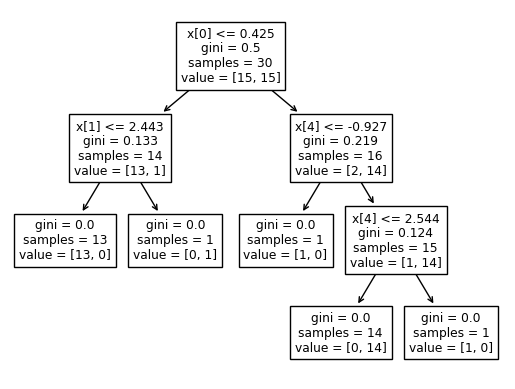

In [69]:
from sklearn.tree import plot_tree
print(df1)
plot_tree(dt1)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.06\ngini = 0.498\nsamples = 30\nvalue = [14, 16]'),
 Text(0.25, 0.5, 'x[3] <= -2.583\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.75, 0.5, 'x[0] <= -1.882\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

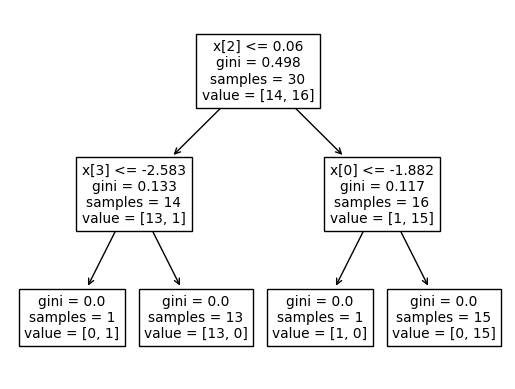

In [70]:
plot_tree(dt2)


[Text(0.5909090909090909, 0.9, 'x[2] <= 0.131\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(0.36363636363636365, 0.7, 'x[1] <= -0.491\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.18181818181818182, 0.5, 'x[3] <= -2.253\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5454545454545454, 0.5, 'x[3] <= 0.489\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.45454545454545453, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.6363636363636364, 0.3, 'x[4] <= 2.176\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5454545454545454, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7272727272727273, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8181818181818182, 0.7, 'x[0] <= -1.303\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.7272727272727273, 0.5, 'gini = 0.0\nsamples = 2\nval

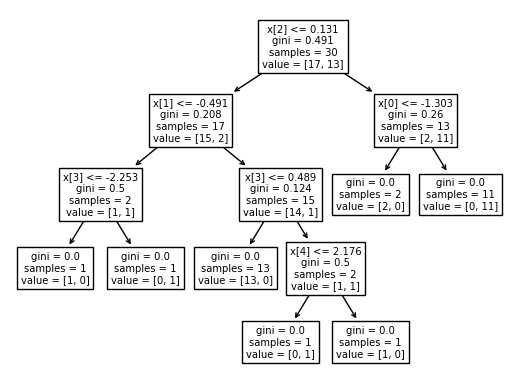

In [71]:
plot_tree(dt3)
